
# Project: Kaggle Soccer Database - What Makes a Winning Team? 



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Kaggle Soccer Database contains 25k+ matches, players & teams attributes for European Professional Football between 2008-2016. In this project, I will be using the Kaggle soccer database to explore the features and investigate the following:

**1. Aggregated Match Results**
Which teams have won the most between 2008-2016?
What percentage of games do they win?
How does team performance differ at home versus on the road?

**2. Margin of Victory**
Which teams win by the greatest average margin? At home vs away?
Do the best teams also win by the greatest margin?

**3.Team Attributes most closely associated with the most winning teams**
Which attributes most closely correlate with winning percentage?
How do the attributes of the top *25%* of teams differ from the rest of the teams?
 
Rationale: If I'm part of the management of a team, I want to know what sets the best teams apart, and to be able to compare my team against those top teams across attributes. This can help inform strategic and tactical decisions.

* Dependent Variable = winning %
* Independent Variables = Home/Away, Margin of Victory, Various Team Attributes

In [2]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

I used the below two SQL Queries used to extract data from the SQLite Kaggle Soccer Database into csv files:

#### 1. Match Dataset (Merges Country, League, Matches, Team Names)

SELECT c.name AS country_name, l.name AS league_name, m.season, m.stage, m.date, m.home_team_api_id, ht.team_long_name AS home_team, m.away_team_api_id, at.team_long_name AS away_team, m.home_team_goal, m.away_team_goal
FROM Country AS c
JOIN League AS l
ON c.id = l.country_id
JOIN Match AS m
ON c.id = m.country_id
LEFT JOIN team AS ht
ON m.home_team_api_id = ht.team_api_id
LEFT JOIN team AS at
ON m.away_team_api_id = at.team_api_id

#### 2. Teams Dataset (Merges Team Names & Team Attributes)

SELECT *
FROM Team t
JOIN Team_Attributes ta
ON t.team_api_id = ta.team_api_id

In [3]:
#load match data
df_match = pd.read_csv('match_team_league_country.csv')
df_match.head()

,country_name,league_name,season,stage,date,home_team_api_id,home_team,away_team_api_id,away_team,home_team_goal,away_team_goal
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,4049,Tubize,9996,Royal Excel Mouscron,1,2
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,7947,FCV Dender EH,9985,Standard de Liège,1,3
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,9984,KSV Cercle Brugge,8635,RSC Anderlecht,0,3
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,9999,KSV Roeselare,8571,KV Kortrijk,2,2
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,10000,SV Zulte-Waregem,9994,Sporting Lokeren,0,0


In [4]:
#load team data
df_team = pd.read_csv('team_attributes.csv')
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id.1,team_fifa_api_id.1,team_api_id.1,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,49119,9930,434,FC Aarau,AAR,1,434,9930,2010-02-22 00:00:00,60,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,49119,9930,434,FC Aarau,AAR,2,434,9930,2014-09-19 00:00:00,52,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,49119,9930,434,FC Aarau,AAR,3,434,9930,2015-09-10 00:00:00,47,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,39393,8485,77,Aberdeen,ABE,4,77,8485,2010-02-22 00:00:00,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,39393,8485,77,Aberdeen,ABE,5,77,8485,2011-02-22 00:00:00,47,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


Check columns, nulls, duplicates, and datatypes to understand the state of the data. Also look at the distribution and summary statistics of numerical variables. 

In [5]:
# check column labels, null values, datatypes
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
country_name        25979 non-null object
league_name         25979 non-null object
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
home_team_api_id    25979 non-null int64
home_team           25979 non-null object
away_team_api_id    25979 non-null int64
away_team           25979 non-null object
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(5), object(6)
memory usage: 2.2+ MB


In [6]:
#check for duplicates
df_match.duplicated().sum()

0

In general, the Match set looks pretty good, though we may want to drop some columns and change the date datatype

Now we will look at some of the trends in the numerical fields. From the describe() summary below, we can already see the average score in a match, that home teams score more, and that 10 goals is the most scored in a match. 

In [7]:
#Check summary stats for numerical variables
df_match.describe()

,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
count,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000
mean,18.242773,9984.371993,9984.475115,1.544594,1.160938
std,10.407354,14087.453758,14087.445135,1.297158,1.142110
min,1.000000,1601.000000,1601.000000,0.000000,0.000000
25%,9.000000,8475.000000,8475.000000,1.000000,0.000000
50%,18.000000,8697.000000,8697.000000,1.000000,1.000000
75%,27.000000,9925.000000,9925.000000,2.000000,2.000000
max,38.000000,274581.000000,274581.000000,10.000000,9.000000


Histograms show the distribution of home and away goals - we can see that it is more common for teams to post higher goal scores at home.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f588fec3c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f588de2ff28>]], dtype=object)

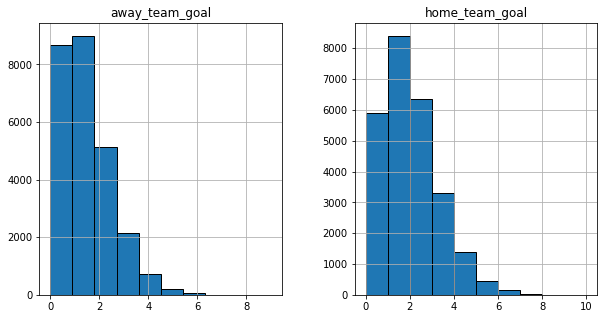

In [8]:
#look at distributions of numerical variables
df_match[['away_team_goal','home_team_goal']].hist(figsize = (10,5),ec='black')

Now we will do the same checks on columns, nulls, datatypes, and distributions for the Teams dataset

In [9]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 30 columns):
id                                1458 non-null int64
team_api_id                       1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_long_name                    1458 non-null object
team_short_name                   1458 non-null object
id.1                              1458 non-null int64
team_fifa_api_id.1                1458 non-null int64
team_api_id.1                     1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing

In [10]:
df_team.duplicated().sum()

0

There are uneeded columns to drop, and a large percentage of nulls in the buildUpPlayDribbling category that need to be dealt with.

Once again, .describe() can be used to understand trends in the numerical variables, though these numbers don't mean too much to us right now. Histograms below show the distribution of scores.

In [11]:
#check stats for numerical variables
df_team.describe()

,id,team_api_id,team_fifa_api_id,id.1,team_fifa_api_id.1,team_api_id.1,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,22692.858711,9995.727023,17706.982167,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,15015.159107,13264.869900,39179.857739,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1601.000000,1.000000,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,9547.250000,8457.750000,110.000000,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,20524.500000,8674.000000,485.000000,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,35294.000000,9904.000000,1900.000000,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,50204.000000,274581.000000,112513.000000,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f588dd79518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f588d9f2748>]], dtype=object)

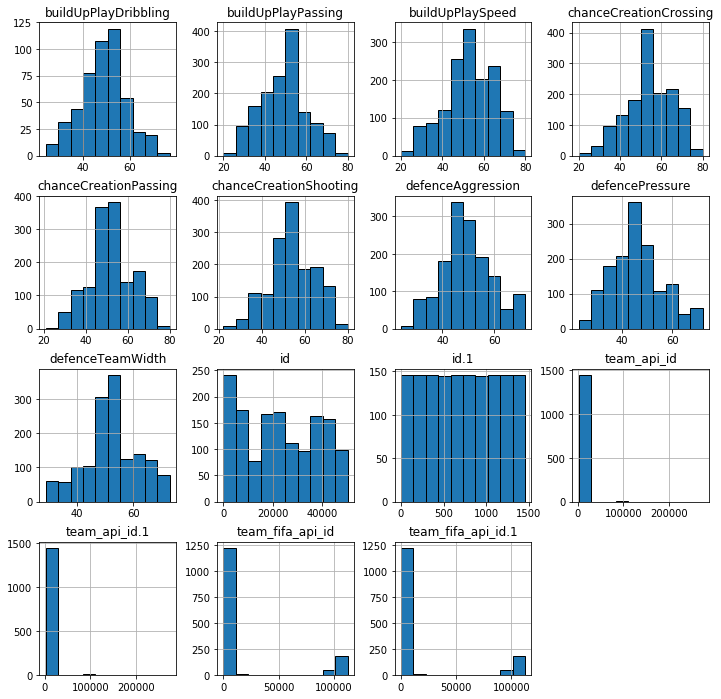

In [12]:
#look at distributions of variables
df_team.hist(figsize = (12,12),ec='black')

## Data Cleaning

### **Match Dataset**: 
1. Drop unneeded columns
2. Re-label columns for easier reference
3. Fix datatypes

In [13]:
#drop unneeded ID columns
df_match.drop(columns=['home_team_api_id','away_team_api_id'],inplace=True)

In [14]:
#re-label columns for easier reference
df_match.rename(columns={'home_team_goal':'home_goal','away_team_goal':'away_goal'},inplace=True)
df_match.head()

,country_name,league_name,season,stage,date,home_team,away_team,home_goal,away_goal
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,Tubize,Royal Excel Mouscron,1,2
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Roeselare,KV Kortrijk,2,2
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0


In [15]:
#convert date from object to datetime64 type
df_match['date']=pd.to_datetime(df_match['date'],format= '%Y-%m-%d')
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 9 columns):
country_name    25979 non-null object
league_name     25979 non-null object
season          25979 non-null object
stage           25979 non-null int64
date            25979 non-null datetime64[ns]
home_team       25979 non-null object
away_team       25979 non-null object
home_goal       25979 non-null int64
away_goal       25979 non-null int64
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.8+ MB


### **Data Cleaning and Preparation for Team Attributes Dataset**
1.  Drop unneeded columns - all the ids and team short name
2.  Re-label columns
3.  Address nulls in buildUpPlayDribbling
4.  Fix datatypes: 
        1) turn season from object to datetime (just a year) 
        2) turn buildUpPlayDribbling from float64 to int64

In [16]:
#drop unneeded columns
df_team.drop(columns=['id','team_api_id','team_fifa_api_id','id.1','team_fifa_api_id.1','team_api_id.1','team_short_name'],inplace=True)

In [17]:
#re-label ambiguous columns
df_team.rename(columns={'date':'season'},inplace=True)

In [18]:
#validate columns and names are fixed
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 23 columns):
team_long_name                    1458 non-null object
season                            1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootingClass       1458 non-null object
chanceCreationPositioningClass    1458 non-null object
defencePressure   

#### Null Values: 
* There are 969 null values for buildUpPlayDribbling. In order to figure out how to deal with the null rows, we should understand what class the null values fall into

In [19]:
#understand the different classes for buildUpPlayDribbling
df_team['buildUpPlayDribblingClass'].value_counts()

Little    1004
Normal     433
Lots        21
Name: buildUpPlayDribblingClass, dtype: int64

In [20]:
#to identify which classes the null values are part of, create a datafram isolating the null rows for these two columns
df_dribbling = df_team[['buildUpPlayDribbling','buildUpPlayDribblingClass']]
df_dribbling_null = df_dribbling[df_dribbling['buildUpPlayDribbling'].isnull()]
df_dribbling_null.buildUpPlayDribblingClass.value_counts()

Little    969
Name: buildUpPlayDribblingClass, dtype: int64

* It looks like all the nulls are from the 'Little' class. So we can safely replace the values with the mean of the 'little' class, which is ~30 as shown in the cell below 

In [21]:
df_dribbling[df_dribbling['buildUpPlayDribblingClass']=='Little'].describe() #stats for class 'Little'

,buildUpPlayDribbling
count,35.000000
mean,30.485714
std,2.489642
min,24.000000
25%,29.000000
50%,32.000000
75%,32.000000
max,33.000000


In [22]:
#replace nulls with the mean: 30
df_team['buildUpPlayDribbling'].fillna(30,inplace=True)

df_team.info() #check that all null values are filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 23 columns):
team_long_name                    1458 non-null object
season                            1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              1458 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootingClass       1458 non-null object
chanceCreationPositioningClass    1458 non-null object
defencePressure  

**Fix datatypes:** 

1) Convert buildUpPlayDribbling from float64 to int64

In [23]:
df_team.buildUpPlayDribbling = df_team.buildUpPlayDribbling.astype(int)

2) Convert season from object to just a year value (i.e. 2008)

In [24]:
df_team['season']=pd.to_datetime(df_team['season'],format= '%Y-%m-%d')

In [25]:
#convert to just a year
years = [x.year for x in df_team['season']]
df_team['season'] = years

In [26]:
#verify that the datatypes are correct and that the data displays as expected
df_team.dtypes

team_long_name                    object
season                             int64
buildUpPlaySpeed                   int64
buildUpPlaySpeedClass             object
buildUpPlayDribbling               int64
buildUpPlayDribblingClass         object
buildUpPlayPassing                 int64
buildUpPlayPassingClass           object
buildUpPlayPositioningClass       object
chanceCreationPassing              int64
chanceCreationPassingClass        object
chanceCreationCrossing             int64
chanceCreationCrossingClass       object
chanceCreationShooting             int64
chanceCreationShootingClass       object
chanceCreationPositioningClass    object
defencePressure                    int64
defencePressureClass              object
defenceAggression                  int64
defenceAggressionClass            object
defenceTeamWidth                   int64
defenceTeamWidthClass             object
defenceDefenderLineClass          object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Aggregated Match Results 

 * How does team performance differ at home versus on the road?
 * Which teams have won the most between 2008-2016? 
 * What percentage of games do they win? 


Create a calculated field to show whether each match was won by the home team, away team, or tied

In [27]:
def winner_type(df_match):
    if df_match["home_goal"] > df_match["away_goal"]:
        return 'home'
    elif df_match['home_goal'] < df_match['away_goal']:
        return 'away'
    elif df_match["home_goal"] == df_match["away_goal"]:
        return 'tie'
    
df_match['winner_type'] = df_match.apply(lambda x: winner_type(x),axis=1)
df_match.head()

,country_name,league_name,season,stage,date,home_team,away_team,home_goal,away_goal,winner_type
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,Tubize,Royal Excel Mouscron,1,2,away
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,FCV Dender EH,Standard de Liège,1,3,away
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,KSV Cercle Brugge,RSC Anderlecht,0,3,away
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,KSV Roeselare,KV Kortrijk,2,2,tie
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,SV Zulte-Waregem,Sporting Lokeren,0,0,tie


* Create a chart to illustrate win percentage of the home team, away team, or a tie game

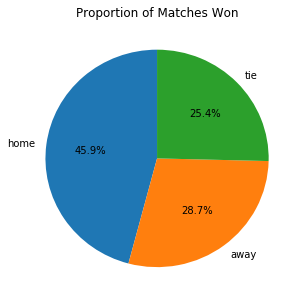

In [28]:
fig, ax = plt.subplots()
winner_type = df_match['winner_type'].value_counts()
winner_type.plot.pie(y=winner_type,figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Proportion of Matches Won')
plt.show()

We can see that home teams win about 46% of the time, compared to only about 29% for away teams

Now we will create a calculated field to determine the name of the team who won each match:

In [29]:
def winner(df_match):
    if df_match["home_goal"] > df_match["away_goal"]:
        return df_match['home_team']
    elif df_match['home_goal'] < df_match['away_goal']:
        return df_match["away_team"]
    elif df_match["home_goal"] == df_match["away_goal"]:
        return "TIE"
    
df_match['winner'] = df_match.apply(lambda x: winner(x),axis=1)
df_match.head()

,country_name,league_name,season,stage,date,home_team,away_team,home_goal,away_goal,winner_type,winner
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,Tubize,Royal Excel Mouscron,1,2,away,Royal Excel Mouscron
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,FCV Dender EH,Standard de Liège,1,3,away,Standard de Liège
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,KSV Cercle Brugge,RSC Anderlecht,0,3,away,RSC Anderlecht
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,KSV Roeselare,KV Kortrijk,2,2,tie,TIE
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,SV Zulte-Waregem,Sporting Lokeren,0,0,tie,TIE


With a bit of sorting, we can already quickly see which teams won the most total games across all seasons

In [30]:
#top 10 teams with the most wins across all seasons
top_10_wins = df_match['winner'].value_counts().sort_values(ascending=False).head(11)
top_10_wins = top_10_wins.drop(index='TIE')

In [31]:
top_10_wins

FC Barcelona         234
Real Madrid CF       228
Celtic               218
FC Bayern Munich     193
Manchester United    192
Juventus             189
SL Benfica           185
FC Porto             183
Ajax                 181
FC Basel             180
Name: winner, dtype: int64

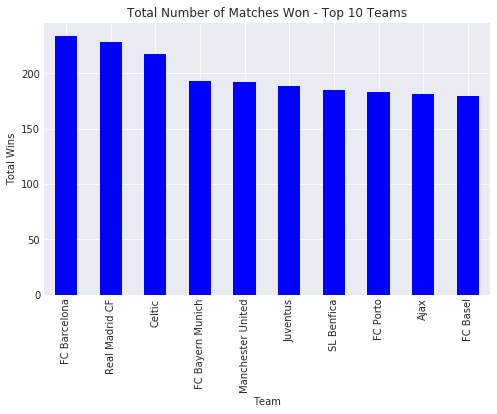

In [32]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize=(8,5))
top_10_wins.plot.bar(color=['blue'])
ax.set_xlabel('Team')
ax.set_ylabel('Total Wins')
ax.set_title('Total Number of Matches Won - Top 10 Teams')
plt.show()

We can see that FC Barcelona, Real Madrid CF and Celtic are the only teams to win over 200 matches in the 2008-2016 time period.

The next few cells are used to calculate the overall winning percentage of teams across all seasons in the database. Winning percentage is calculated as **Total Wins / Total Games**, so we will be creating a new data frame to aggregate data by team

In [33]:
#create a new dataframe to aggegrate total wins for each team
wins = pd.DataFrame(df_match.groupby(["league_name","season","winner"])["winner"].count())
wins = wins.rename(columns={'winner':'team','winner':'wins'}).reset_index()
wins = wins.rename(columns={'winner':'team'})
wins = wins[wins.team != 'TIE'].reset_index() #drop the ties rows and the index

In [34]:
#create a new dataframe to aggregate total games played by team
total_games = pd.DataFrame(df_match.groupby(["league_name","season","home_team"])["home_team"].count())
total_games = total_games.rename(columns={'home_team':'team','home_team':'games'}).reset_index()
total_games = total_games.rename(columns={'home_team':'team'}).reset_index()
total_games['games'] = total_games['games']*2 #half the games are home games, other half are away games, so we need to multiply the number of home games *2

In [35]:
#merge the wins and total_games dataframes
results = total_games.merge(wins,how='inner',left_index=True,right_index=True)
results = results.drop(columns=['index_x','season_x','index_y','league_name_y','team_y'])
results = results.rename(columns={'league_name_x': 'league','season_y':'season','team_x':'team'})
results = results.drop_duplicates(keep='first')
results = results.reindex(columns=['league','season','team','games','wins'])
results.sort_values('wins',ascending=False).head()

,league,season,team,games,wins
690,Italy Serie A,2013/2014,Juventus,38,33
1321,Spain LIGA BBVA,2012/2013,FC Barcelona,38,32
1311,Spain LIGA BBVA,2011/2012,Real Madrid CF,38,32
1262,Spain LIGA BBVA,2009/2010,FC Barcelona,38,31
1203,Scotland Premier League,2013/2014,Celtic,38,31


#### Add a new calculated column to the results dataframe for winning percentage as wins/games

In [36]:
results['win_pct'] = results['wins'] / results['games']

In [37]:
#show the top 10 best seasons by a team in term of win percentage
results = results.sort_values('win_pct',ascending=False)
results.head(10)

,league,season,team,games,wins,win_pct
1046,Portugal Liga ZON Sagres,2010/2011,FC Porto,30,27,0.900000
690,Italy Serie A,2013/2014,Juventus,38,33,0.868421
535,Germany 1. Bundesliga,2013/2014,FC Bayern Munich,34,29,0.852941
516,Germany 1. Bundesliga,2012/2013,FC Bayern Munich,34,29,0.852941
1136,Portugal Liga ZON Sagres,2015/2016,SL Benfica,34,29,0.852941
862,Netherlands Eredivisie,2014/2015,PSV,34,29,0.852941
1311,Spain LIGA BBVA,2011/2012,Real Madrid CF,38,32,0.842105
1321,Spain LIGA BBVA,2012/2013,FC Barcelona,38,32,0.842105
570,Germany 1. Bundesliga,2015/2016,FC Bayern Munich,34,28,0.823529
1262,Spain LIGA BBVA,2009/2010,FC Barcelona,38,31,0.815789


#### We now have win percentage data on a season level, but we need to aggregate across all seasons and calculate the mean win percentage for each team between 2008-2016

In [38]:
results_avg = results.groupby(['league','team'],as_index=False).mean().sort_values(['league','win_pct'],ascending=False)
results_avg.head()

,league,team,games,wins,win_pct
284,Switzerland Super League,FC Basel,35.75,22.500,0.629493
282,Switzerland Super League,BSC Young Boys,35.75,17.750,0.495711
291,Switzerland Super League,FC Zürich,35.75,15.000,0.418913
292,Switzerland Super League,Grasshopper Club Zürich,35.75,14.375,0.400735
286,Switzerland Super League,FC Luzern,35.75,13.125,0.367443


#### Now we will create visualizations that show the distribution of the win_pct variable, as well as the top 10 teams

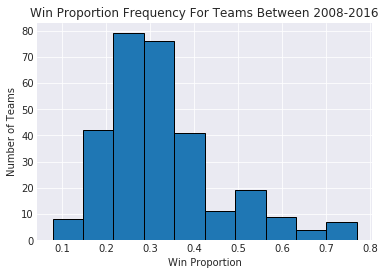

In [39]:
#plot a histogram showing distribution of win percentages
fig, ax = plt.subplots()
ax.hist(results_avg['win_pct'],bins=10,ec='black')
ax.set_xlabel('Win Proportion')
ax.set_ylabel('Number of Teams')
ax.set_title('Win Proportion Frequency For Teams Between 2008-2016')
plt.show()

In [40]:
#create a dataframe for the just top 10 teams by win_pct
top_10 = results_avg.sort_values('win_pct',ascending=False).head(10)
bottom_10 = results_avg.sort_values('win_pct',ascending=True).head(10)

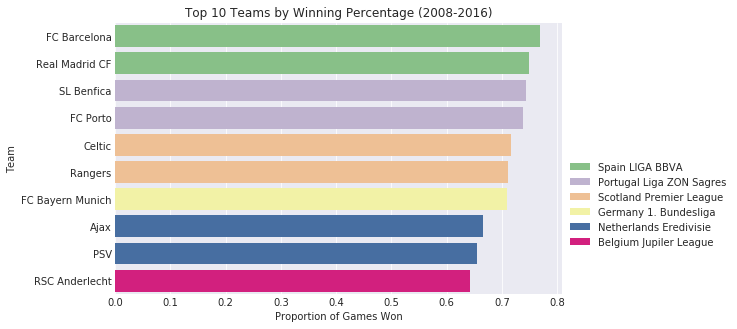

In [41]:
#display a bar chart comparing win percentages of the top 10 teams across all seasons
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_style('darkgrid')
ax = sns.barplot(data = top_10, x='win_pct',y='team',hue='league',palette='Accent',dodge=False)
ax.set_title('Top 10 Teams by Winning Percentage (2008-2016)')
ax.set_xlabel('Proportion of Games Won')
ax.set_ylabel('Team')
ax.legend(bbox_to_anchor=(1.01, 0.5),borderaxespad=0)
plt.show()

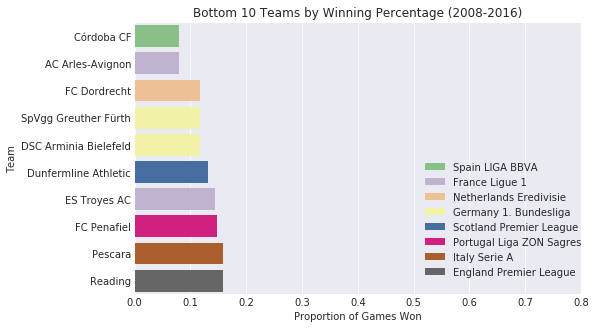

In [42]:
#display a bar chart comparing win percentages of the bottom 10 teams across all seasons
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_style('darkgrid')
ax = sns.barplot(data = bottom_10, x='win_pct',y='team',hue='league',palette='Accent',dodge=False)
ax.set_title('Bottom 10 Teams by Winning Percentage (2008-2016)')
ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
ax.set_xlabel('Proportion of Games Won')
ax.set_ylabel('Team')
ax.legend(bbox_to_anchor=(1.01, 0.5),borderaxespad=0)
plt.show()

The top 10 teams all win over 60% of their games, while none of the bottom 10 teams even win 20% of their games.

### Research Question 2:  Margins of Victory

#### This section will investigate whether the best teams also win by the most goals

We will start my calculating the margin of victory for each match, and then aggegrating for home and away averages

In [43]:
#calculate margin of victory for each match
df_match['margin'] = (df_match['home_goal'] - df_match['away_goal'])
df_match.head()

,country_name,league_name,season,stage,date,home_team,away_team,home_goal,away_goal,winner_type,winner,margin
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,Tubize,Royal Excel Mouscron,1,2,away,Royal Excel Mouscron,-1
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,FCV Dender EH,Standard de Liège,1,3,away,Standard de Liège,-2
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,KSV Cercle Brugge,RSC Anderlecht,0,3,away,RSC Anderlecht,-3
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,KSV Roeselare,KV Kortrijk,2,2,tie,TIE,0
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,SV Zulte-Waregem,Sporting Lokeren,0,0,tie,TIE,0


#### Which teams have the greatest margin of victory away?

In [44]:
away_margin = df_match[['away_team','home_goal','away_goal','margin']].groupby(['away_team']).mean()
away_margin = away_margin.rename(columns={'away_team':'team','away_goal':'agf','home_goal':'aga','margin':'away_margin'}).reset_index()
away_margin = away_margin.rename(columns={'away_team':'team'})
away_margin['away_margin'] = away_margin['away_margin']*-1 #multiply by -1 so that there are positive margins when the away team wins
away_margin.sort_values('away_margin',ascending=False).head(10)

,team,aga,agf,away_margin
75,FC Barcelona,0.861842,2.328947,1.467105
89,FC Porto,0.774194,1.983871,1.209677
211,Real Madrid CF,1.032895,2.223684,1.190789
207,Rangers,0.750000,1.934211,1.184211
232,SL Benfica,0.838710,1.991935,1.153226
77,FC Bayern Munich,0.845588,1.992647,1.147059
49,Celtic,0.888158,2.013158,1.125000
15,Ajax,1.161765,2.110294,0.948529
184,PSV,1.235294,2.073529,0.838235
133,Juventus,0.840000,1.573333,0.733333


#### Which teams have the greatest margin of victory at home?

In [45]:
home_margin = df_match[['home_team','home_goal','away_goal','margin']].groupby(['home_team']).mean()
home_margin = home_margin.rename(columns={'home_team':'team','home_goal':'hgf','away_goal':'hga','margin':'home_margin'}).reset_index()
home_margin = home_margin.rename(columns={'home_team':'team'})
home_margin.sort_values('home_margin',ascending=False).head(10)

,team,hgf,hga,home_margin
75,FC Barcelona,3.256579,0.664474,2.592105
211,Real Madrid CF,3.322368,0.967105,2.355263
77,FC Bayern Munich,2.808824,0.705882,2.102941
15,Ajax,2.647059,0.573529,2.073529
49,Celtic,2.559211,0.578947,1.980263
232,SL Benfica,2.588710,0.661290,1.927419
89,FC Porto,2.379032,0.524194,1.854839
184,PSV,2.720588,0.926471,1.794118
207,Rangers,2.328947,0.736842,1.592105
205,RSC Anderlecht,2.330189,0.745283,1.584906


#### Merge the home_margin and away_margin dataframe together

In [46]:
margin = home_margin.merge(away_margin,how='inner',left_index=True,right_index=True)
margin = margin.drop(columns=['team_y'])
margin = margin.rename(columns={'team_x': 'team'})
margin = margin.drop_duplicates(keep='first')
margin = margin.reindex(columns=['team','hgf','hga','home_margin','agf','aga','away_margin'])
margin.head()

,team,hgf,hga,home_margin,agf,aga,away_margin
0,1. FC Kaiserslautern,1.088235,1.382353,-0.294118,1.029412,1.705882,-0.676471
1,1. FC Köln,1.137255,1.362745,-0.225490,1.078431,1.686275,-0.607843
2,1. FC Nürnberg,1.270588,1.388235,-0.117647,1.000000,1.776471,-0.776471
3,1. FSV Mainz 05,1.436975,1.084034,0.352941,1.252101,1.596639,-0.344538
4,AC Ajaccio,1.122807,1.350877,-0.228070,0.912281,1.877193,-0.964912


#### Add a column for the average margin of victory. The assumption we are making is that the number of home games and number of away games are equal for each team

In [47]:
margin['avg_margin'] = (margin['home_margin'] + margin['away_margin']) / 2
margin.sort_values('avg_margin',ascending=False).head(10)

,team,hgf,hga,home_margin,agf,aga,away_margin,avg_margin
75,FC Barcelona,3.256579,0.664474,2.592105,2.328947,0.861842,1.467105,2.029605
211,Real Madrid CF,3.322368,0.967105,2.355263,2.223684,1.032895,1.190789,1.773026
77,FC Bayern Munich,2.808824,0.705882,2.102941,1.992647,0.845588,1.147059,1.625000
49,Celtic,2.559211,0.578947,1.980263,2.013158,0.888158,1.125000,1.552632
232,SL Benfica,2.588710,0.661290,1.927419,1.991935,0.838710,1.153226,1.540323
89,FC Porto,2.379032,0.524194,1.854839,1.983871,0.774194,1.209677,1.532258
15,Ajax,2.647059,0.573529,2.073529,2.110294,1.161765,0.948529,1.511029
207,Rangers,2.328947,0.736842,1.592105,1.934211,0.750000,1.184211,1.388158
184,PSV,2.720588,0.926471,1.794118,2.073529,1.235294,0.838235,1.316176
205,RSC Anderlecht,2.330189,0.745283,1.584906,1.698113,0.971698,0.726415,1.155660


#### Merge these newly created margin of victory statistics with the match results dataset

In [48]:
merged = results_avg.merge(margin,how='inner',left_on='team',right_on='team',left_index=False,right_index=False)
merged.sort_values('avg_margin',ascending=False).head(10)

,league,team,games,wins,win_pct,hgf,hga,home_margin,agf,aga,away_margin,avg_margin
15,Spain LIGA BBVA,FC Barcelona,38.000000,29.250000,0.769737,3.256579,0.664474,2.592105,2.328947,0.861842,1.467105,2.029605
16,Spain LIGA BBVA,Real Madrid CF,38.000000,28.500000,0.750000,3.322368,0.967105,2.355263,2.223684,1.032895,1.190789,1.773026
173,Germany 1. Bundesliga,FC Bayern Munich,34.000000,24.125000,0.709559,2.808824,0.705882,2.102941,1.992647,0.845588,1.147059,1.625000
48,Scotland Premier League,Celtic,38.000000,27.250000,0.717105,2.559211,0.578947,1.980263,2.013158,0.888158,1.125000,1.552632
65,Portugal Liga ZON Sagres,SL Benfica,31.000000,23.125000,0.743382,2.588710,0.661290,1.927419,1.991935,0.838710,1.153226,1.540323
66,Portugal Liga ZON Sagres,FC Porto,31.000000,22.875000,0.738971,2.379032,0.524194,1.854839,1.983871,0.774194,1.209677,1.532258
116,Netherlands Eredivisie,Ajax,34.000000,22.625000,0.665441,2.647059,0.573529,2.073529,2.110294,1.161765,0.948529,1.511029
49,Scotland Premier League,Rangers,38.000000,27.000000,0.710526,2.328947,0.736842,1.592105,1.934211,0.750000,1.184211,1.388158
117,Netherlands Eredivisie,PSV,34.000000,22.250000,0.654412,2.720588,0.926471,1.794118,2.073529,1.235294,0.838235,1.316176
272,Belgium Jupiler League,RSC Anderlecht,30.285714,19.428571,0.641657,2.330189,0.745283,1.584906,1.698113,0.971698,0.726415,1.155660


Now we have an aggregated dataset with league, team, match, results, and margin of victory statistics, which we can use to generate insights

#### In the next few cells, we will group the teams into tiers based on winning percentage, in order to evaluate trends between the top 25% and bottom 75% of teams

In [49]:
#determine percentiles for mean win_pct
merged.describe().win_pct

count    296.000000
mean       0.326348
std        0.127926
min        0.078947
25%        0.236842
50%        0.297308
75%        0.378642
max        0.769737
Name: win_pct, dtype: float64

In [50]:
#define the bin edges to cut the data into groups
bin_edges = [0.078,0.378,0.770]

In [51]:
#name each tier
bin_names = ['bottom_75','top_25']

In [52]:
#apply tiering in a new column in results df
merged['tier'] = pd.cut(merged['win_pct'],bin_edges,labels=bin_names)
merged.head()

,league,team,games,wins,win_pct,hgf,hga,home_margin,agf,aga,away_margin,avg_margin,tier
0,Switzerland Super League,FC Basel,35.75,22.500,0.629493,2.405594,0.881119,1.524476,1.923077,1.293706,0.629371,1.076923,top_25
1,Switzerland Super League,BSC Young Boys,35.75,17.750,0.495711,2.230769,1.160839,1.069930,1.468531,1.447552,0.020979,0.545455,top_25
2,Switzerland Super League,FC Zürich,35.75,15.000,0.418913,1.685315,1.202797,0.482517,1.587413,1.601399,-0.013986,0.234266,top_25
3,Switzerland Super League,Grasshopper Club Zürich,35.75,14.375,0.400735,1.636364,1.132867,0.503497,1.363636,1.650350,-0.286713,0.108392,top_25
4,Switzerland Super League,FC Luzern,35.75,13.125,0.367443,1.671329,1.202797,0.468531,1.272727,1.650350,-0.377622,0.045455,bottom_75


#### Using groupby, we can do a direct comparison of top_25 and bottom_75 percentiles

In [53]:
merged.groupby(['tier']).mean().sort_values(['win_pct'],ascending=False)

,games,wins,win_pct,hgf,hga,home_margin,agf,aga,away_margin,avg_margin
tier,,,,,,,,,,
top_25,35.092381,17.611429,0.502661,1.923520,0.966192,0.957328,1.446139,1.292142,0.153998,0.555663
bottom_75,35.260386,9.387012,0.266514,1.239113,1.352935,-0.113822,0.926155,1.751029,-0.824874,-0.469348


We can see that the top 25% of teams win almost twice as many games on average as the bottom 75%, and that there are differences in nearly every statistical category.

#### Now we will create a plot to explore the relationship between win percentage and margin of victory - Do the winningest teams also win by the greatest margin?

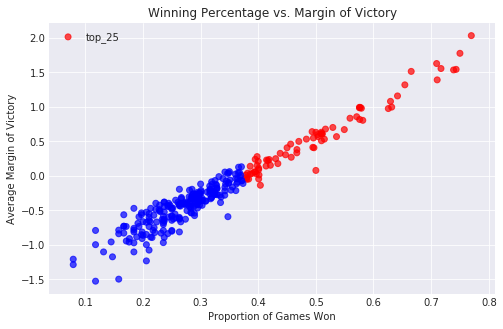

In [54]:
#plot a scatter of win_pct vs avg_margin, indicating tier
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 5))
colors = list()
palette = {'top_25': "red", 'bottom_75': "blue"} #create a color mapping to be used to distinguish top 25 from bottom 75
for c in merged['tier']: 
    colors.append(palette[c])
ax.scatter(merged['win_pct'],merged['avg_margin'],c=colors,marker='o',alpha=0.7,label=palette)
ax.set_title('Winning Percentage vs. Margin of Victory')
ax.set_xlabel('Proportion of Games Won')
ax.set_ylabel('Average Margin of Victory')
plt.legend(palette)
plt.show()

We can see from the above chart that there is a positive correlation between margin of victory and games won, with the top 25% of clubs also having a higher margin of victory

### Research Question 3:  Which team attributes are most associated with winning?

In this research question, we will investigate if there are certain team attributes that are associated with the top 25% versus bottom 75% of teams. We will look at all attributes generally, and then hone in on a few of interest.

#### To start, we will take the average team attribute values across all seasons and add this to the merged results table

In [55]:
#create a new table with average ratings by team
team_ratings = df_team.groupby('team_long_name').mean().round().astype(int)
team_ratings.drop(columns='season',inplace=True)
team_ratings.reset_index(inplace=True)
team_ratings.head()

,team_long_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1. FC Kaiserslautern,51,37,52,47,62,60,47,53,55
1,1. FC Köln,57,37,61,55,42,59,45,51,61
2,1. FC Nürnberg,45,40,48,50,53,59,43,50,44
3,1. FSV Mainz 05,62,36,52,53,48,54,52,62,50
4,AC Ajaccio,60,39,49,50,41,52,38,50,49


In [56]:
#Merge the team results and attributes into one table for analysis
combined_data = merged.merge(team_ratings,how='inner',left_on='team',right_on='team_long_name')
combined_data.drop(columns='team_long_name',inplace=True)
combined_data.head()

,league,team,games,wins,win_pct,hgf,hga,home_margin,agf,aga,...,tier,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,Switzerland Super League,FC Basel,35.75,22.500,0.629493,2.405594,0.881119,1.524476,1.923077,1.293706,...,top_25,55,41,45,61,64,52,48,58,54
1,Switzerland Super League,BSC Young Boys,35.75,17.750,0.495711,2.230769,1.160839,1.069930,1.468531,1.447552,...,top_25,54,39,63,46,68,52,46,40,54
2,Switzerland Super League,FC Zürich,35.75,15.000,0.418913,1.685315,1.202797,0.482517,1.587413,1.601399,...,top_25,57,36,50,48,55,54,49,46,56
3,Switzerland Super League,Grasshopper Club Zürich,35.75,14.375,0.400735,1.636364,1.132867,0.503497,1.363636,1.650350,...,top_25,50,40,53,53,59,50,38,47,52
4,Switzerland Super League,FC Luzern,35.75,13.125,0.367443,1.671329,1.202797,0.468531,1.272727,1.650350,...,bottom_75,52,37,52,53,48,61,48,48,50


#### Next we will plot a correlation heatmap to identify general trends between team attributes and win percentage

In [57]:
#Use corr() to get correlation coefficients between win_pct and all team variables
correlation = combined_data.corr()
correlation['win_pct'].sort_values(ascending=False)

win_pct                   1.000000
avg_margin                0.973202
wins                      0.964719
home_margin               0.953338
away_margin               0.919335
hgf                       0.904541
agf                       0.886782
defencePressure           0.340267
chanceCreationShooting    0.176328
defenceAggression         0.166554
chanceCreationPassing     0.152372
defenceTeamWidth          0.113012
chanceCreationCrossing    0.104326
buildUpPlayDribbling      0.055840
buildUpPlaySpeed          0.025303
games                    -0.069246
buildUpPlayPassing       -0.291193
aga                      -0.736555
hga                      -0.748674
Name: win_pct, dtype: float64

In [58]:
#drop unneeded columns that are not team attributes
correlation.drop(columns=['avg_margin','wins','home_margin','away_margin','hgf','agf','games','aga','hga'],inplace=True)

Text(0.5,1,'Heatmap of Correlations Between Team Attribute Variables')

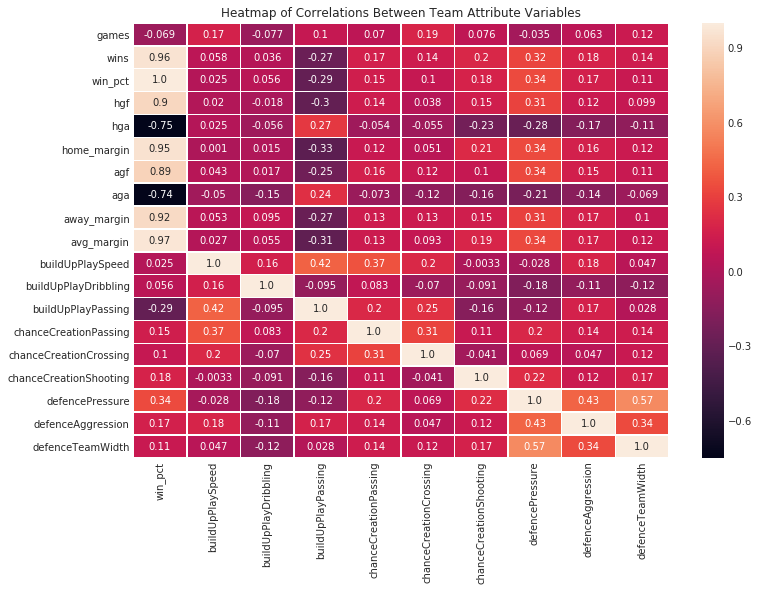

In [68]:
#create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(correlation, annot=True, fmt='.2',linewidths=.5)
ax.set_title('Heatmap of Correlations Between Team Attribute Variables')

Looking at the heatmap, we can see that attributes like wins, margin of victory and goals for have a strong positive correlation with winning percentage. This is not surprising. Likewise, goals against attributes have a strong negative correlation with winning percentage.

Most of the team attributes have relatively weak correlations with winning percentage, with two exceptions that we will investigate.

1) **defencePressure**, which has a 0.34 correlation with win percentage

2) **buildUpPlayPassing**, which has a -0.29 correlation with win percentage

#### Let's use a scatter plot to explore defencePressure vs win_pct

Text(0,0.5,'Proportion of Games Won')

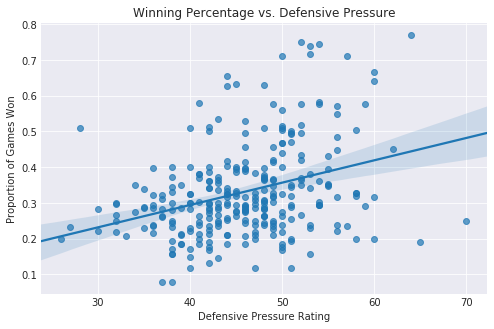

In [60]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_style('darkgrid')
ax = sns.regplot(data=combined_data, x='defencePressure', y='win_pct', scatter_kws={'alpha':0.7})
ax.set_title('Winning Percentage vs. Defensive Pressure')
ax.set_xlabel('Defensive Pressure Rating')
ax.set_ylabel('Proportion of Games Won')

We can see that in many cases, teams with more defensive pressure win more games. Validating why that is the case or implying any causation is beyond the scope of this investigation, though hypotheses include more possession time and/or a greater likelihood to score in transition.

#### Let's use a scatter plot to explore buildUpPlayPassing vs win_pct

Text(0,0.5,'Proportion of Games Won')

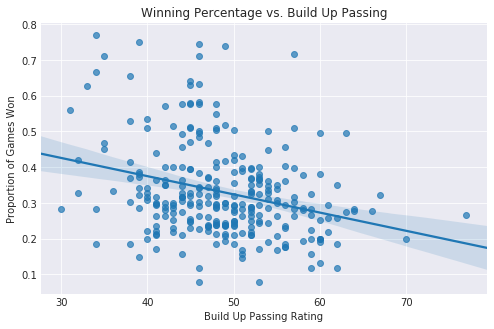

In [61]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_style('darkgrid')
ax = sns.regplot(data=combined_data, x='buildUpPlayPassing', y='win_pct', scatter_kws={'alpha':0.7})
ax.set_title('Winning Percentage vs. Build Up Passing')
ax.set_xlabel('Build Up Passing Rating')
ax.set_ylabel('Proportion of Games Won')

Interestingly enough, while there are many outliers, we can see that the better teams often spend less time passing the ball around without creating chances.

#### Finally, we can compare the average rating scores between the two tiers we created, top_25 and bottom_75 percentile.

In [62]:
#group results by tier
tiers = combined_data.groupby(['tier']).mean().sort_values('win_pct',ascending=False)
top_25 = tiers.iloc[0]
bottom_75 = tiers.iloc[1]

In [63]:
#to prepare to plot the comparison, we will transpose the data so that the indexes are now the column headers
tiers = tiers.transpose()

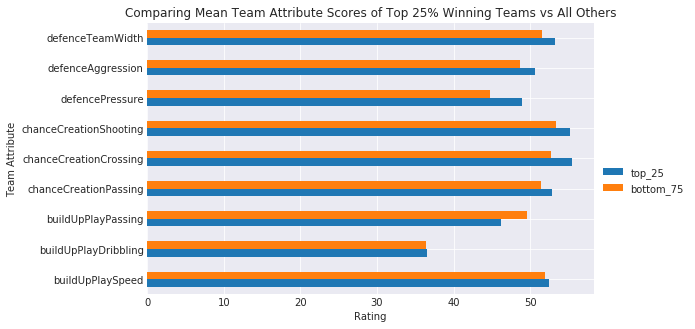

In [64]:
tiers = tiers.drop(index=['games','wins','win_pct','avg_margin','away_margin','aga','agf','home_margin','hga','hgf'])
tiers.plot.barh(figsize=(8,5)).legend(loc='upper left',bbox_to_anchor=(1.0, 0.5));
plt.xlabel("Rating")
plt.ylabel('Team Attribute')
plt.title('Comparing Mean Team Attribute Scores of Top 25% Winning Teams vs All Others')
plt.show()

From this chart, we can see that the top teams scored higher than others across all of the Defence and Chance Creation attributes. However, this did not hold true for the Build Up Play characteristics, with the top teams actually scoring lower in build up passing.

<a id='conclusions'></a>
## Conclusions

Through this analysis, we identified the teams that won the most and used them as benchmark to compare other statistics against. Unsurprisingly, the winningest teams were also the ones who scored the most and won by the most.

Looking at team attributes, the top teams scored higher across all the Defence and Chance Creation categories, though most individual attributes were not highly correlated with win percentage. An exception was defensive pressure, which had a 0.34 correlation score, indicating that to some degree a higher-pressure defensive system was related to more wins. However, with the current dataset, we don't have any understanding of why this is the case, nor if there is any causation. We can create hypotheses on why this might be the case (i.e. more pressure leads to more turnovers and scoring chances), but ultimately deeper analysis into the defensive pressure statistic would be required to make any validated conclusion.

It is also important to note that this analysis ignores a crucial element to team success, the players. We focused on team and match outcomes in this investigation, but to get a complete picture on the best teams, an analysis of players and their attributes should be conducted in tandem. It's possible the best teams are able to play the way they do because they have the best players.

Finally, it's important to note that this is an introductory project, so any comparisons or insights gleaned are not backed by advanced statistical tests, nor do they include measures of error such as standard deviation.

In [69]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0